In [ ]:
# download InferSent sentence encoder and GloVe vectors
!git clone https://github.com/facebookresearch/InferSent
!cp -r ./InferSent/* .
!mkdir -p dataset/GloVe
!curl -Lo encoder/infersent1.pickle https://dl.fbaipublicfiles.com/senteval/infersent/infersent1.pkl
!curl -Lo dataset/GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
!unzip dataset/GloVe/glove.840B.300d.zip -d dataset/GloVe/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import nltk
nltk.download('punkt')

### Today's data

![img](https://github.com/yandexdataschool/nlp_course/raw/master/resources/banhammer.jpg)

__In this notebook__ you will build an algorithm that classifies social media comments into normal or toxic.
Like in many real-world cases, you only have a small (10^3) dataset of hand-labeled examples to work with.

You won't have to deal with low-level text processing tasks. It's only about deep learning. And it's gonna be a breeze!

In [ ]:
!wget https://raw.githubusercontent.com/yandexdataschool/nlp_course/fecdbfa974819a6656737569b2b2aed738a1b979/week02_classification/comments.tsv -O comments.tsv
data = pd.read_csv("comments.tsv", sep='\t')

texts = data['comment_text'].values
target = data['should_ban'].values

tokenizer = nltk.WordPunctTokenizer()
data['comment_text'] = data['comment_text'].apply(
    lambda sent: ' '.join(tokenizer.tokenize(sent.lower().replace('\n', ' ')))
)

data[50::200]

### InferSent

We are going to use a pre-trained InferSent model: a bidirectional LSTM that was trained for a range of supervised tasks:
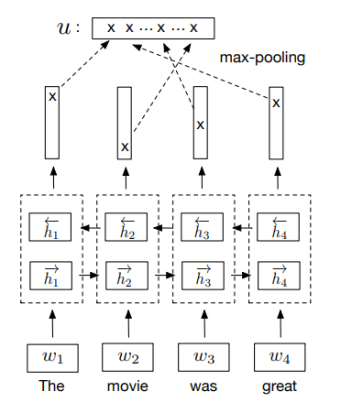

This model is but one of many "NLP model zoo" exhibits. The only reason we picked it was because it was the simplest one to use in pytorch.

In [ ]:
# Load infersent model
from models import InferSent
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': 1}
model = InferSent(params_model)
model.load_state_dict(torch.load("./encoder/infersent1.pickle"))
model.set_w2v_path('./dataset/GloVe/glove.840B.300d.txt')
model.build_vocab_k_words(K=100000)

Here's how you can encode data into vector space. InferSent returns 4096-dimensional activations from the last layer.

In [ ]:
sentences = sorted(data.comment_text.tolist(), key=len)[200:210]

embeddings = model.encode(sentences, bsize=128, tokenize=False, verbose=True)

print('embeddings shape:', embeddings.shape)

In [ ]:
def cosine_similarity(embeddings):
    dot = (embeddings[None, :, :] * embeddings[:, None, :]).sum(-1)
    norms = np.sqrt(np.square(embeddings).sum(-1))
    return dot / norms[None, :] / norms[:, None]


plt.imshow(cosine_similarity(embeddings), cmap='gray')
plt.yticks(np.arange(len(sentences)), sentences);
plt.xticks(np.arange(len(sentences)), sentences, rotation=90);
plt.colorbar();

In [ ]:
from sklearn.manifold import TSNE
sentences = data.comment_text.tolist()
targets = data.should_ban.values

embeddings = <convert all sentences to vectors>

emb_2d = <learn 2d representation for :embeddings: with TSNE>
assert emb_2d.shape == (len(embeddings), 2)

In [ ]:
plt.scatter(*emb_2d[targets == 0].T, label='normal', alpha=0.5)
plt.scatter(*emb_2d[targets == 1].T, label='offensive', alpha=0.5)
plt.legend(loc='best')

### And now, let's classify

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

<YOUR CODE HERE>

# make k >= 5-fold cross validation and print how well it performs

### Learn more:
* Finding similar questions with Universal Sentence Encoder: [notebook](https://github.com/yandexdataschool/nlp_course/tree/master/week10_dialogue)
* Generating stories with pre-trained BERT: [open in colab](https://colab.research.google.com/drive/1MxKZGtQ9SSBjTK5ArsZ5LKhkztzg52RV)
* Semantic search engine with ELMO: [open in colab](https://colab.research.google.com/drive/13f6dKakC-0yO6_DxqSqo0Kl41KMHT8A1)



